In [3]:
import pandas as pd
df=pd.read_csv('/Users/bashayeralemadi/Desktop/PETE-219(Seers)/Group 4/poro_perm_data.csv')

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy.stats import anderson
import pylab 
import scipy.stats as stats
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

## 1. Data Import and Cleaning

In [23]:
df=pd.read_csv('/Users/bashayeralemadi/Desktop/PETE-219(Seers)/Group 4/poro_perm_data.csv')

In [24]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies
0,3526.5,9.526876,15.733116,'overbanks'
1,3638.0,21.271527,94.850556,'crevasse splay'
2,4020.0,26.812356,68.457613,'crevasse splay'
3,4226.0,45.077395,397.786445,'channel'
4,4469.5,26.210385,146.109850,'channel'
...,...,...,...,...
153,2091.0,40.773237,413.890340,'channel'
154,1291.0,18.473484,32.161080,'overbanks'
155,2826.0,25.629876,253.618050,'channel'
156,2026.5,40.174724,348.257560,'channel'


In [25]:
df.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               3
dtype: int64

In [26]:
df['Facies'].fillna("channel",inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth (ft)         158 non-null    float64
 1   Porosity (%)       158 non-null    float64
 2   Permeability (mD)  158 non-null    float64
 3   Facies             158 non-null    object 
dtypes: float64(3), object(1)
memory usage: 5.1+ KB


<Axes: >

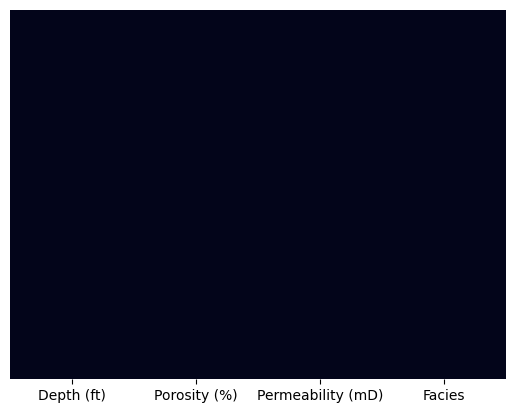

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [29]:
# Encode the 'Facies' column
label_encoder = LabelEncoder()
df['Facies_encoded'] = label_encoder.fit_transform(df['Facies'])
X = df[['Depth (ft)', 'Porosity (%)', 'Permeability (mD)']]
y = df['Facies_encoded']
reg = LinearRegression()
reg.fit(X, y)



LinearRegression()

In [30]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies,Facies_encoded
0,3526.5,9.526876,15.733116,'overbanks',2
1,3638.0,21.271527,94.850556,'crevasse splay',1
2,4020.0,26.812356,68.457613,'crevasse splay',1
3,4226.0,45.077395,397.786445,'channel',0
4,4469.5,26.210385,146.109850,'channel',0
...,...,...,...,...,...
153,2091.0,40.773237,413.890340,'channel',0
154,1291.0,18.473484,32.161080,'overbanks',2
155,2826.0,25.629876,253.618050,'channel',0
156,2026.5,40.174724,348.257560,'channel',0


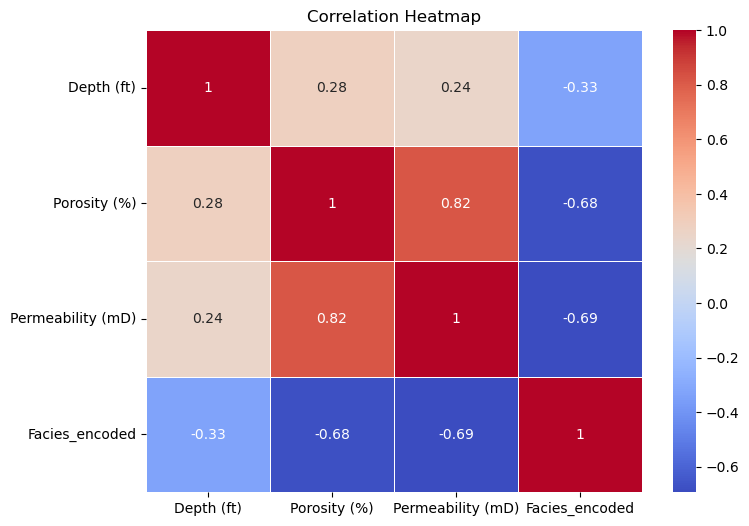

In [31]:
correlation_matrix = df.drop("Facies",axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



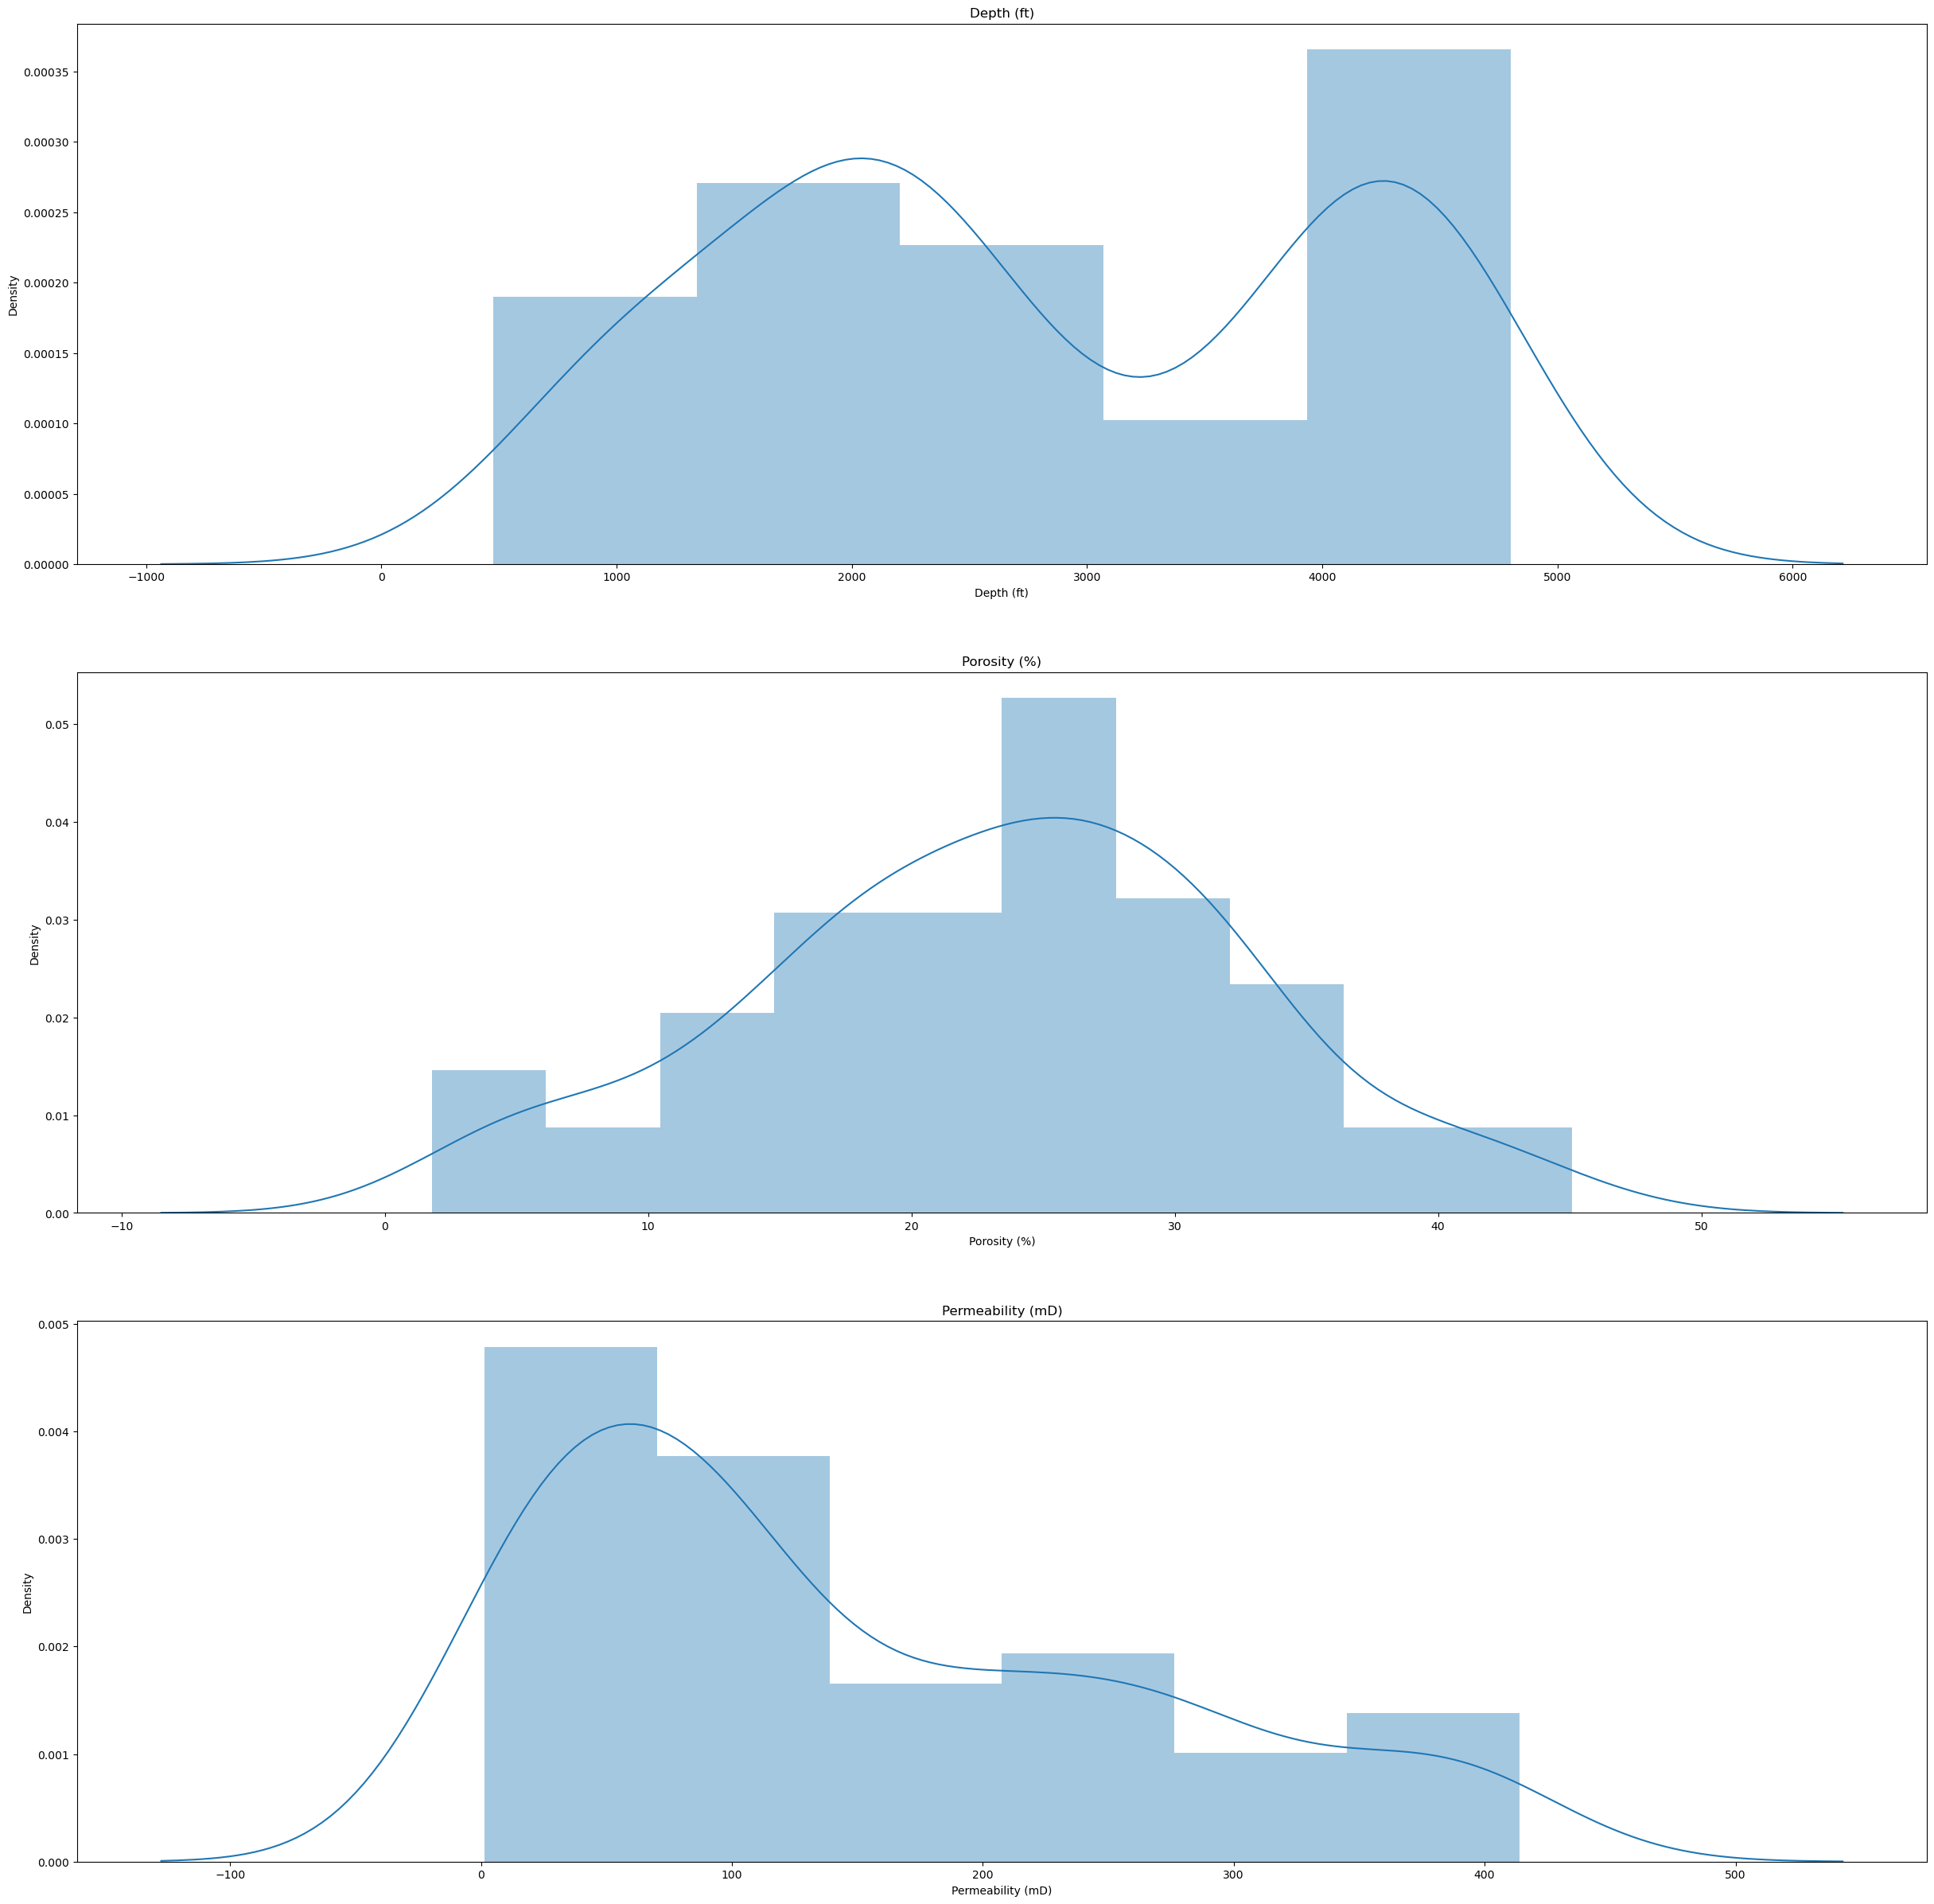

In [32]:
# Distplot to nsee the distribution
fig,axes=plt.subplots(nrows=3,ncols=1)
axes=axes.flatten()
fig.set_size_inches(30,30)
cols=list(df.select_dtypes(include=np.number).columns)
for ax,col in zip(axes,cols):
    print()
    sns.distplot(df[col],ax=ax)
    ax.set_title(col)

In [33]:
df.describe()

,Depth (ft),Porosity (%),Permeability (mD),Facies_encoded
count,158.000000,158.000000,158.000000,158.000000
mean,2810.550633,23.312898,144.314697,0.803797
std,1294.556944,9.440922,118.193927,0.840525
min,475.000000,1.794799,1.372193,0.000000
25%,1817.750000,17.578806,36.087192,0.000000
50%,2489.750000,24.108258,99.118338,1.000000
75%,4203.500000,29.854740,235.397674,1.000000
max,4802.000000,45.077395,413.890340,3.000000


1. min values of each column

In [34]:
cols=list(df.select_dtypes(include=np.number).columns)
for col in cols:
    minn=min(df[col])
    print(f"Min value in column {col} is ", minn)

Min value in column Depth (ft) is  475.0
Min value in column Porosity (%) is  1.794799185
Min value in column Permeability (mD) is  1.372193138
Min value in column Facies_encoded is  0


2. max values of each column

In [35]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    maxx=max(df[col])
    print(f"Max value in column {col} is ", maxx)

Max value in column Depth (ft) is  4802.0
Max value in column Porosity (%) is  45.07739488
Max value in column Permeability (mD) is  413.8903399
Max value in column Facies_encoded is  3


2. Avg values of each column

In [36]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    avg=0
    for val in df[col]:
        avg+=val
    avg/=len(df[col])
    print(f"Mean value in column {col} is ", avg)

Mean value in column Depth (ft) is  2810.5506329113923
Mean value in column Porosity (%) is  23.31289763911393
Mean value in column Permeability (mD) is  144.3146970482469
Mean value in column Facies_encoded is  0.8037974683544303


Mode

In [37]:
cols=list(df.select_dtypes(include=np.number).columns)

mode=0
for col in cols:
    mode=df[col].mode()[0]
    print(f"Mode for the column {col} is: ",mode)

Mode for the column Depth (ft) is:  1814.0
Mode for the column Porosity (%) is:  1.794799185
Mode for the column Permeability (mD) is:  1.372193138
Mode for the column Facies_encoded is:  0


Median'


In [38]:
cols=list(df.select_dtypes(include=np.number).columns)

median=0
for col in cols:
    median=df[col].median()
    print(f"Median for the column {col} is: ",median)

Median for the column Depth (ft) is:  2489.75
Median for the column Porosity (%) is:  24.108258274999997
Median for the column Permeability (mD) is:  99.11833779
Median for the column Facies_encoded is:  1.0


Standard Deviation

In [39]:
cols=list(df.select_dtypes(include=np.number).columns)

std=0
for col in cols:
    std=df[col].std()
    print(f"Standard Deviation for the column {col} is: ",std)

Standard Deviation for the column Depth (ft) is:  1294.5569443378513
Standard Deviation for the column Porosity (%) is:  9.440922322903333
Standard Deviation for the column Permeability (mD) is:  118.19392698678827
Standard Deviation for the column Facies_encoded is:  0.8405250160873914



Variance|

In [40]:
cols=list(df.select_dtypes(include=np.number).columns)

var=0
for col in cols:
    std=df[col].std()
    var=std**2
    print(f"Variance for the column {col} is: ",var)

Variance for the column Depth (ft) is:  1675877.6821333547
Variance for the column Porosity (%) is:  89.13101430709446
Variance for the column Permeability (mD) is:  13969.804376558237
Variance for the column Facies_encoded is:  0.7064823026687096


As we have seen there are NULL values so either we can remove them or we can impute them

In [41]:
df.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
Facies_encoded       0
dtype: int64

In [42]:
df['Facies'].value_counts()

'channel'           71
'crevasse splay'    50
'overbanks'         34
channel              3
Name: Facies, dtype: int64

We are imputing the most frequent categorical value

In [43]:
df.isnull().sum()

Depth (ft)           0
Porosity (%)         0
Permeability (mD)    0
Facies               0
Facies_encoded       0
dtype: int64

Now we will plot the columns

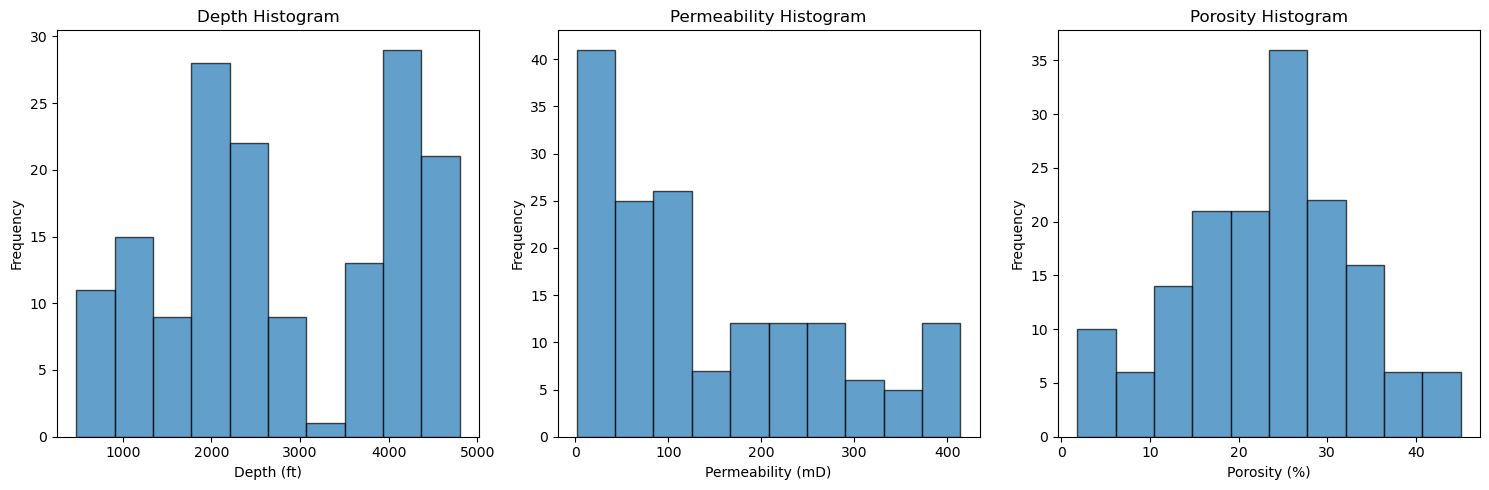

In [44]:
## Hist plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(df['Depth (ft)'], bins=10, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Depth (ft)')
ax1.set_ylabel('Frequency')
ax1.set_title('Depth Histogram')

ax2.hist(df['Permeability (mD)'], bins=10, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Permeability (mD)')
ax2.set_ylabel('Frequency')
ax2.set_title('Permeability Histogram')

ax3.hist(df['Porosity (%)'], bins=10, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Porosity (%)')
ax3.set_ylabel('Frequency')
ax3.set_title('Porosity Histogram')

plt.tight_layout()

plt.show()



Removing the outliers using the Inter Quantile Range
Sort your data from low to high

Identify the first quartile (Q1), the median, and the third quartile (Q3).

Calculate your IQR = Q3 – Q1

Calculate your upper fence = Q3 + (1.5 * IQR)

Calculate your lower fence = Q1 – (1.5 * IQR)

Use your fences to highlight any outliers, all values that fall outside your fences.

In [45]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    q3=df[col].quantile(0.3)
    q1=df[col].quantile(0.1)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    df=df[df[col]>=ll]
    df=df[df[col]<=ul]

In [46]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies,Facies_encoded
11,843.5,14.155770,30.844788,'overbanks',2
21,763.0,6.081342,22.135841,'overbanks',2
29,782.5,16.006450,33.469007,'overbanks',2
32,1804.5,9.611012,19.271893,'overbanks',2
46,838.5,14.142863,27.368818,'overbanks',2
48,2174.0,18.827628,35.712632,'overbanks',2
49,842.5,14.317292,20.411508,'overbanks',2
51,1055.5,5.834822,26.436319,'overbanks',2
53,833.0,9.456442,16.681758,'overbanks',2
63,1549.0,14.076264,22.819014,'overbanks',2


In [47]:
df['Facies'].value_counts().index

Index([''overbanks''], dtype='object')

In [48]:
df

,Depth (ft),Porosity (%),Permeability (mD),Facies,Facies_encoded
11,843.5,14.155770,30.844788,'overbanks',2
21,763.0,6.081342,22.135841,'overbanks',2
29,782.5,16.006450,33.469007,'overbanks',2
32,1804.5,9.611012,19.271893,'overbanks',2
46,838.5,14.142863,27.368818,'overbanks',2
48,2174.0,18.827628,35.712632,'overbanks',2
49,842.5,14.317292,20.411508,'overbanks',2
51,1055.5,5.834822,26.436319,'overbanks',2
53,833.0,9.456442,16.681758,'overbanks',2
63,1549.0,14.076264,22.819014,'overbanks',2


## 2. Data Visualization

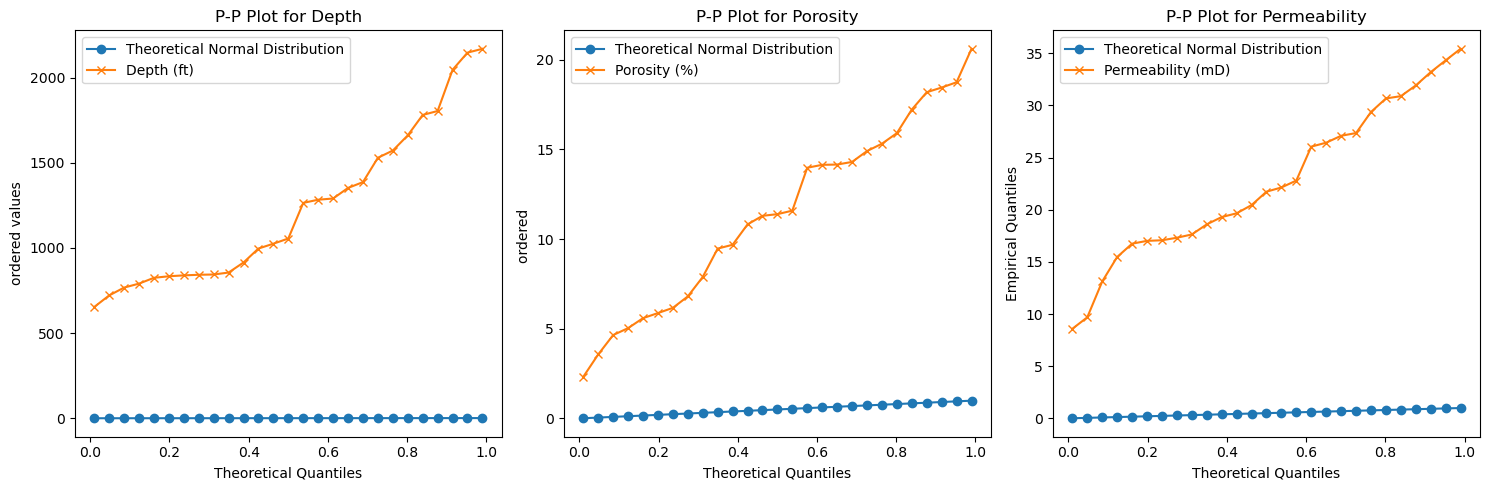

In [49]:
normal_quantiles = np.linspace(0.01, 0.99, len(df))

data_quantiles_depth = df['Depth (ft)'].quantile(normal_quantiles)
data_quantiles_porosity = df['Porosity (%)'].quantile(normal_quantiles)
data_quantiles_permeability = df['Permeability (mD)'].quantile(normal_quantiles)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(normal_quantiles, normal_quantiles, marker='o', linestyle='-', label='Theoretical Normal Distribution')
ax1.plot(normal_quantiles, data_quantiles_depth, marker='x', linestyle='-', label='Depth (ft)')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('ordered values')
ax1.set_title('P-P Plot for Depth')
ax1.legend()

ax2.plot(normal_quantiles, normal_quantiles, marker='o', linestyle='-', label='Theoretical Normal Distribution')
ax2.plot(normal_quantiles, data_quantiles_porosity, marker='x', linestyle='-', label='Porosity (%)')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('ordered ')
ax2.set_title('P-P Plot for Porosity')
ax2.legend()

ax3.plot(normal_quantiles, normal_quantiles, marker='o', linestyle='-', label='Theoretical Normal Distribution')
ax3.plot(normal_quantiles, data_quantiles_permeability, marker='x', linestyle='-', label='Permeability (mD)')
ax3.set_xlabel('Theoretical Quantiles')
ax3.set_ylabel('Empirical Quantiles')
ax3.set_title('P-P Plot for Permeability')
ax3.legend()

plt.tight_layout()

plt.show()

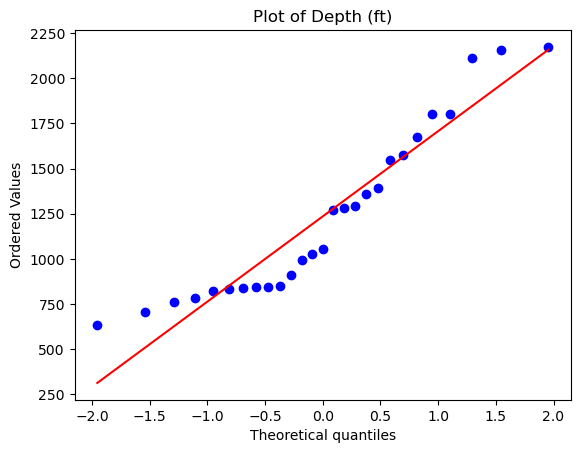

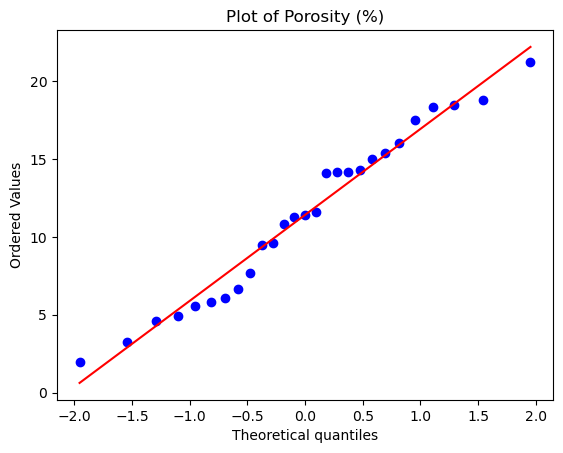

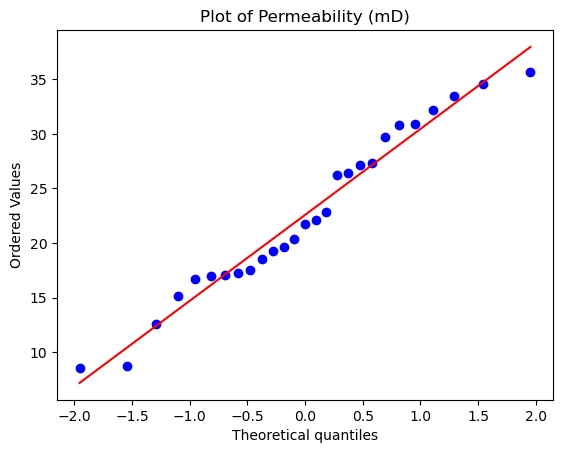

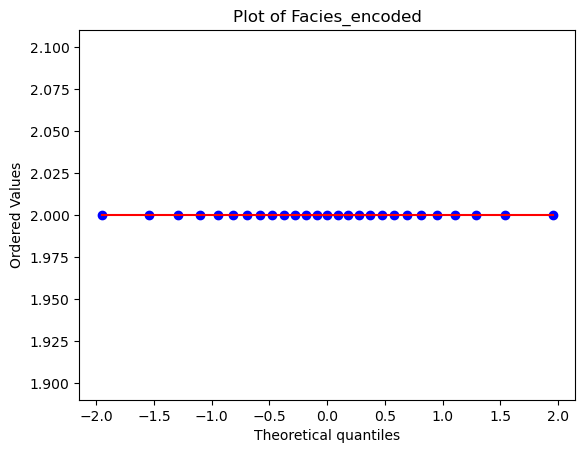

In [50]:
cols=list(df.select_dtypes(include=np.number).columns)

for col in cols:
    stats.probplot(df[col], dist="norm", plot=pylab)
   
    plt.title(f'Plot of {col}')
    pylab.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


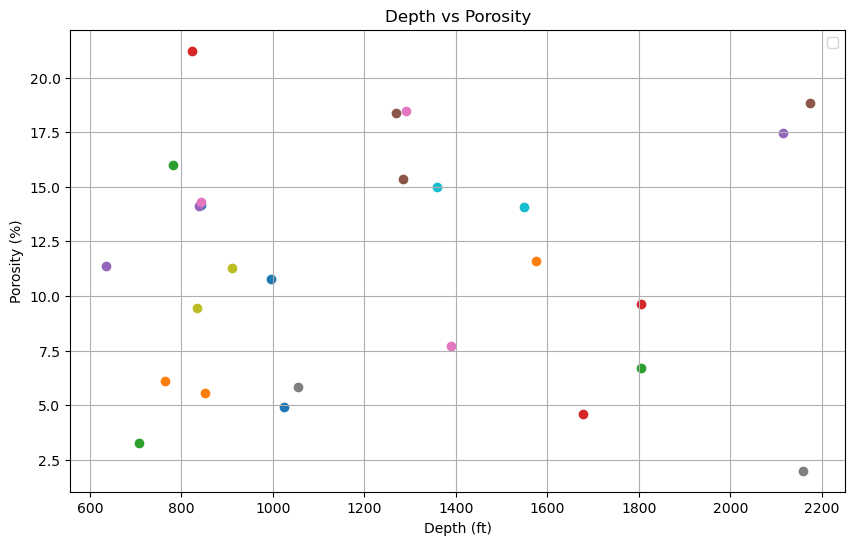

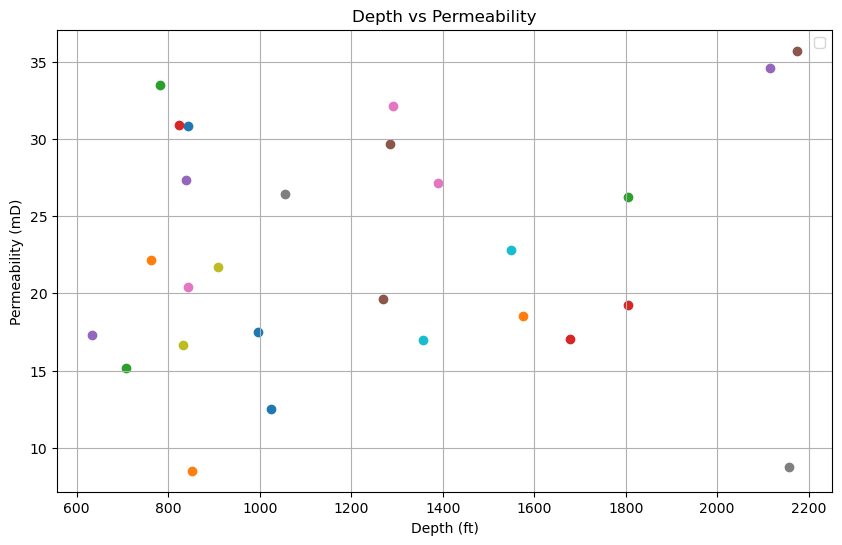

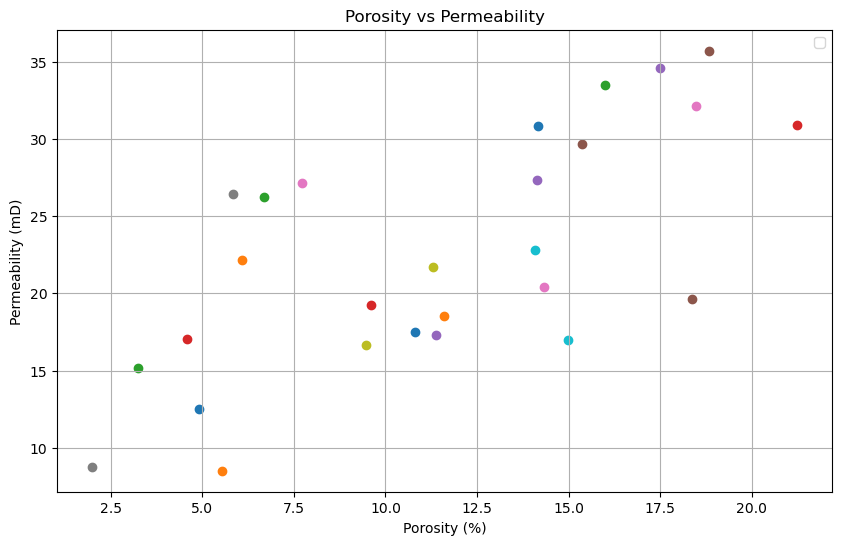

In [51]:
plt.figure(figsize=(10, 6))
for porosity in df['Porosity (%)'].unique():
    data = df[df['Porosity (%)'] == porosity]
    plt.scatter(data['Depth (ft)'], data['Porosity (%)'], marker='o')

plt.xlabel('Depth (ft)')
plt.ylabel('Porosity (%)')
plt.title('Depth vs Porosity')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
for permeability in df['Permeability (mD)'].unique():
    data = df[df['Permeability (mD)'] == permeability]
    plt.scatter(data['Depth (ft)'], data['Permeability (mD)'], marker='o')

plt.xlabel('Depth (ft)')
plt.ylabel('Permeability (mD)')
plt.title('Depth vs Permeability')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
for porosity in df['Porosity (%)'].unique():
    data = df[df['Porosity (%)'] == porosity]
    plt.scatter(data['Porosity (%)'], data['Permeability (mD)'],  marker='o')

plt.xlabel('Porosity (%)')
plt.ylabel('Permeability (mD)')
plt.title('Porosity vs Permeability')
plt.legend()
plt.grid(True)



## 3. Data analysis

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [53]:
df.drop("Facies",axis=1,inplace=True)
df

,Depth (ft),Porosity (%),Permeability (mD),Facies_encoded
11,843.5,14.155770,30.844788,2
21,763.0,6.081342,22.135841,2
29,782.5,16.006450,33.469007,2
32,1804.5,9.611012,19.271893,2
46,838.5,14.142863,27.368818,2
48,2174.0,18.827628,35.712632,2
49,842.5,14.317292,20.411508,2
51,1055.5,5.834822,26.436319,2
53,833.0,9.456442,16.681758,2
63,1549.0,14.076264,22.819014,2


In [54]:
X=df.drop("Facies_encoded",axis=1)

In [55]:
Y=df['Facies_encoded']

In [56]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [58]:
model=KMeans()

In [59]:
model.fit(X_train,Y_train)

KMeans()

In [60]:
model.score(X_test,Y_test)

-7.937029362346526

In [61]:
import pandas as pd
import numpy as np




# Linear Regression
X = df.drop('Facies_encoded', axis=1)
y = df['Facies_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, linear_predictions)
print(f"Linear Regression Mean Squared Error: {mse_linear}")

# K-Means Clustering
kmeans_model = KMeans(n_clusters=len(df['Facies_encoded'].unique()), random_state=42)
kmeans_model.fit(X)
df['Cluster'] = kmeans_model.labels_

# Artificial Neural Networks (ANNs)
ann_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)

accuracy_ann = accuracy_score(y_test, ann_predictions)
print(f"ANN Accuracy: {accuracy_ann}")

# Anderson-Darling Test for Normality
for col in X.columns:
    _, p_value, _ = anderson(df[col])
    print(f"AD Test p-value for {col}: {p_value}")

# Remove the 'Cluster' column added for K-Means clustering
df = df.drop('Cluster', axis=1)


Linear Regression Mean Squared Error: 0.0
ANN Accuracy: 1.0
AD Test p-value for Depth (ft): [0.517 0.589 0.707 0.824 0.98 ]
AD Test p-value for Porosity (%): [0.517 0.589 0.707 0.824 0.98 ]
AD Test p-value for Permeability (mD): [0.517 0.589 0.707 0.824 0.98 ]
